In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('/Users/liu/Desktop/MBAN6110/messy_data.csv')

In [31]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/LuyiLiuAmber/Luyi/main/messy_data.csv')
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [33]:
# always start with info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       105 non-null    int64  
 1   Income    94 non-null     float64
 2   Gender    105 non-null    object 
 3   Product   100 non-null    object 
 4   Quantity  105 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [34]:
# always
df.describe(include='all')

,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [35]:
# for visualize
import seaborn as sns
# visualize because distrubtion may be sknewed even mean and median is close

In [36]:
pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Income', ylabel='Count'>

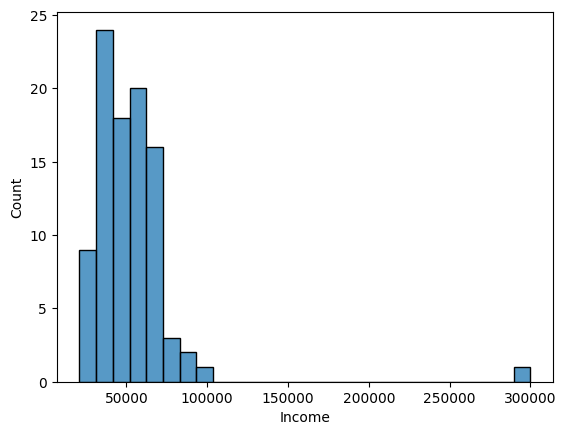

In [37]:
sns.histplot(df['Income'])

<Axes: >

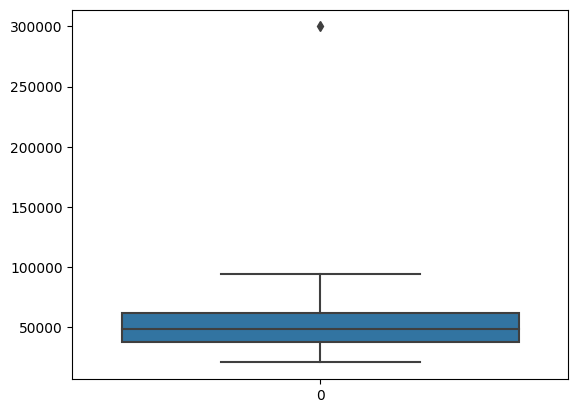

In [38]:
sns.boxplot(df["Income"])
# 1. look for outliers
# top and bottom line: max&min
# regtangle is the mode most around xxx

In [39]:
# write a statement to filiter the data set and identify the outlier
df['Income'].max() # we can't use this because max is a single value


300000.0

In [40]:
df[df['Income'] > 25000]

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
99,61,300000.00000,Male,B,4
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2


In [41]:
# outlier drop
df.drop(99, axis=0, inplace=True)


<Axes: >

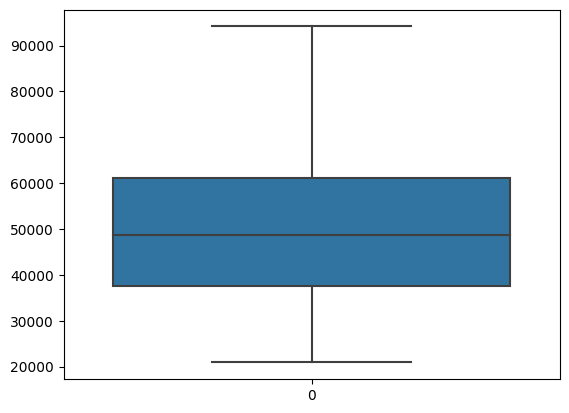

In [42]:
#check
sns.boxplot(df["Income"])

<Axes: xlabel='Income', ylabel='Count'>

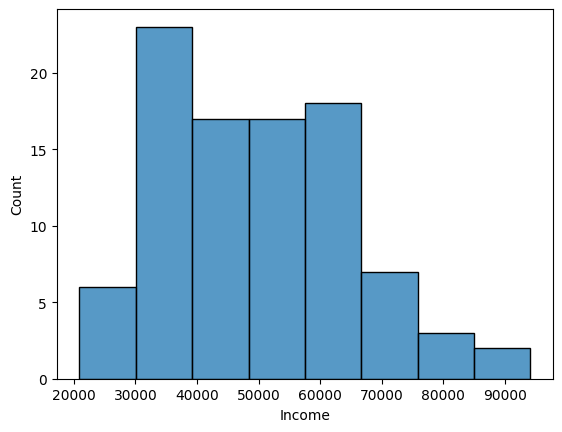

In [43]:
sns.histplot(df['Income'])

<Axes: xlabel='Gender', ylabel='Income'>

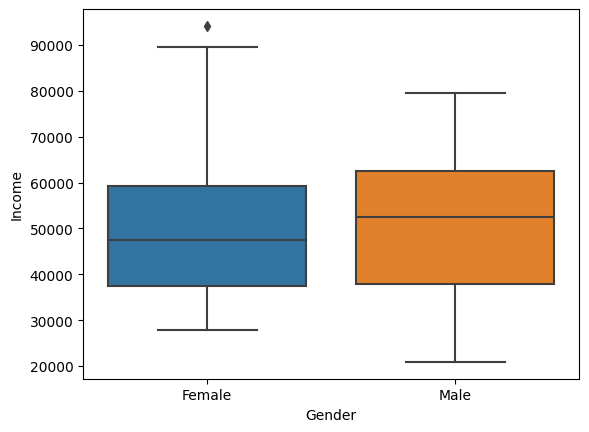

In [44]:
sns.boxplot(data = df, x = 'Gender', y = 'Income')
# if the two boxplot look different the variable is a meaning variable

<Axes: xlabel='Age', ylabel='Income'>

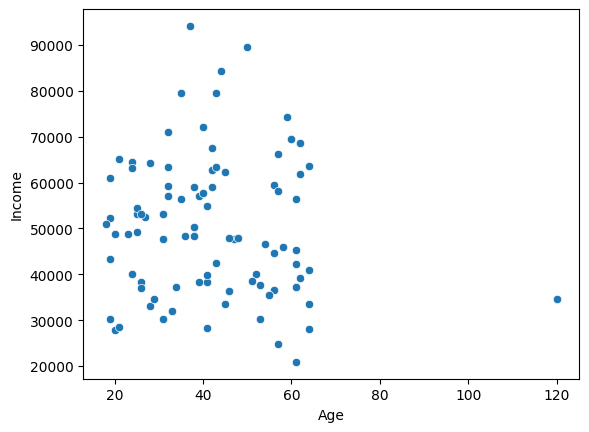

In [46]:
sns.scatterplot(data = df, x = 'Age', y ='Income')

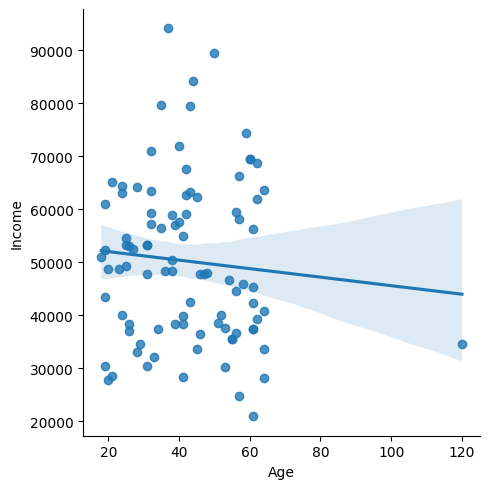

In [47]:
sns.lmplot(data = df, x = 'Age', y = 'Income', fit_reg=True)

In [48]:
#combine the code we type before
df.drop(df[df['Age']==120].index, axis=0, inplace=True)

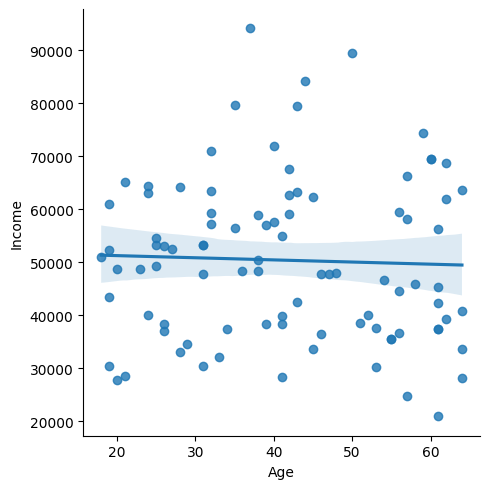

In [49]:
sns.lmplot(data = df, x = 'Age', y = 'Income', fit_reg=True)

In [50]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       98 non-null     int64  
 1   Income    88 non-null     float64
 2   Gender    98 non-null     object 
 3   Product   93 non-null     object 
 4   Quantity  98 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [53]:
df['Product'] = df['Product'].fillna('Other')

In [55]:
df.groupby('Product')['Income'].mean()

Product
A        52599.570360
B        48693.364717
C        50742.171429
D        50377.772819
Other    47685.057048
Name: Income, dtype: float64

In [56]:
df['Income'] = df['Product'].fillna(df['Income'].mean())